Compute the STAs of all the moth campaniform sensilla. Then, use it to build a covariance matrix

In [3]:
import numpy as np
import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import h5py

In [101]:
data_path = 'data/wing_sensilla_data_Pratt/'

# load stimuli used to construct the STAs
stim = loadmat(data_path + 'Motor Tip Displacement.mat')['Tip_Signal'].flatten()

# gather list of relevant files
import glob
nonbase_spike_filenames = []
for file_name in glob.glob(data_path + 'NonBase Spike Trains/NonBase*.mat'):
    nonbase_spike_filenames.append(file_name)

base_spike_filenames = []
for file_name in glob.glob(data_path + 'Base Spike Trains/Spikes*.mat'):
    base_spike_filenames.append(file_name)
    
spike_filenames = nonbase_spike_filenames + base_spike_filenames

In [102]:
# params to construct STAs
sample_rate = 4e4
sta_time_window = 0.04 # in seconds
sample_window = int(sample_rate * sta_time_window)
nTrials = 30

In [103]:
STA = np.empty((0, sample_window))

# load one file
for file in spike_filenames:
    spike_mat = loadmat(file)['WN_Repeat_Matrix']
    
    if len(spike_mat.shape) == 2:
        spike_mat = np.expand_dims(spike_mat, axis=2)

    num_trials, num_sensilla = spike_mat.shape[1], spike_mat.shape[2]

    for sensilla in range(num_sensilla):
        spikes_for_sensilla = spike_mat[:, :, sensilla]
        spike_times = np.argwhere(spikes_for_sensilla == 1)[:, 0]
        spike_times = spike_times[spike_times > sample_window]

        STA_for_sensilla = np.zeros(sample_window)
        for time in spike_times:
            STA_for_sensilla += stim[time - sample_window: time]
        STA_for_sensilla /= len(spike_times)

        STA = np.row_stack((STA, STA_for_sensilla))
        
print(STA.shape)

(95, 1600)


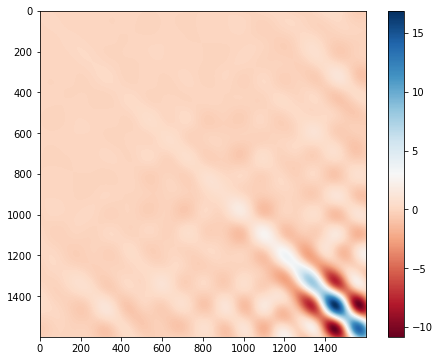

In [105]:
cov = STA.T @ STA

fig = plt.figure(figsize=(8, 6))
plt.imshow(cov, cmap='RdBu')
plt.colorbar()

(95, 1600)